<a href="https://colab.research.google.com/github/rontalapoojareddy/DeepLearning1/blob/main/DL_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2503B05130**

**M.Tech (CSE)**

**R.Pooja Reddy**

**Set Up Environment and Load Data**

In [1]:
!pip install torch torchvision transformers pillow tqdm


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os


**Define Text Encoder Model (BERT)**

In [3]:
from transformers import BertTokenizer, BertModel

class TextEncoder(nn.Module):
    def __init__(self, embed_dim=256):
        super().__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.fc = nn.Linear(768, embed_dim)

    def forward(self, text_inputs):
        outputs = self.bert(**text_inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :]
        return self.fc(cls_embedding)


**GAN Architecture**

In [4]:
class Generator(nn.Module):
    def __init__(self, noise_dim=100, text_dim=256):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(noise_dim + text_dim, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 3 * 64 * 64),
            nn.Tanh()
        )

    def forward(self, noise, text_embedding):
        x = torch.cat((noise, text_embedding), dim=1)
        img = self.net(x)
        return img.view(-1, 3, 64, 64)


**Discriminator**

In [5]:
class Discriminator(nn.Module):
    def __init__(self, text_dim=256):
        super().__init__()
        self.img_fc = nn.Linear(3 * 64 * 64, 512)
        self.text_fc = nn.Linear(text_dim, 512)
        self.out = nn.Linear(1024, 1)

    def forward(self, img, text_embedding):
        img = img.view(img.size(0), -1)
        img_feat = self.img_fc(img)
        text_feat = self.text_fc(text_embedding)
        x = torch.cat((img_feat, text_feat), dim=1)
        return torch.sigmoid(self.out(x))


**Training and Optimization**

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

G = Generator().to(device)
D = Discriminator().to(device)
T = TextEncoder().to(device)

criterion = nn.BCELoss()
opt_G = optim.Adam(G.parameters(), lr=0.0002)
opt_D = optim.Adam(D.parameters(), lr=0.0002)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

**Loading pretrained model**

In [3]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# Load pretrained model
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(device)




Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


**Generate images**

Enter text description for image generation: mountain
How many images to generate?: 8


  0%|          | 0/50 [00:00<?, ?it/s]

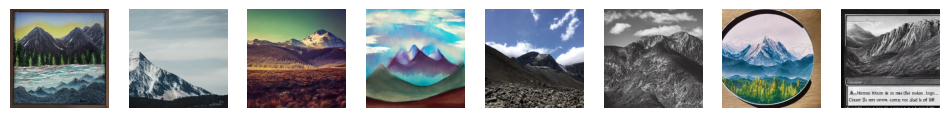

In [8]:
# -------- DYNAMIC USER INPUT --------
prompt = input("Enter text description for image generation: ")

num_images = int(input("How many images to generate?: "))

# Generate images
result = pipe(
    prompt,
    num_images_per_prompt=num_images
)

images = result.images

# Display images
plt.figure(figsize=(12, 6))
for i, img in enumerate(images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(img)
    plt.axis("off")
    img.save(f"generated_{i}.png")

plt.show()